In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit
import joblib


In [2]:
df=pd.read_csv('telco_customer_preprocessed.csv')

In [3]:
df.head()

,SeniorCitizen,tenure,Churn,MonthlyCharges_scaled,TotalCharges_scaled,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,InternetService_FE,OnlineSecurity_FE,OnlineBackup_FE,DeviceProtection_FE,TechSupport_FE,StreamingTV_FE,StreamingMovies_FE,Contract_FE,PaperlessBilling_FE,PaymentMethod_FE
0,0,1,0,-1.160323,0.001275,1,0,0,1,1,...,0.343746,0.496663,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.335794
1,0,34,0,-0.259629,0.215867,0,1,1,0,1,...,0.343746,0.286668,0.438450,0.343888,0.493114,0.398978,0.395428,0.209144,0.407781,0.228880
2,0,2,1,-0.362660,0.010310,0,1,1,0,1,...,0.343746,0.286668,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.228880
3,0,45,0,-0.746535,0.210241,0,1,1,0,1,...,0.343746,0.286668,0.438450,0.343888,0.290217,0.398978,0.395428,0.209144,0.407781,0.219225
4,0,2,1,0.197365,0.015330,1,0,1,0,1,...,0.439585,0.496663,0.438450,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.335794


In [4]:
feature = df.drop(columns=['MonthlyCharges_scaled'])
target = df['MonthlyCharges_scaled']

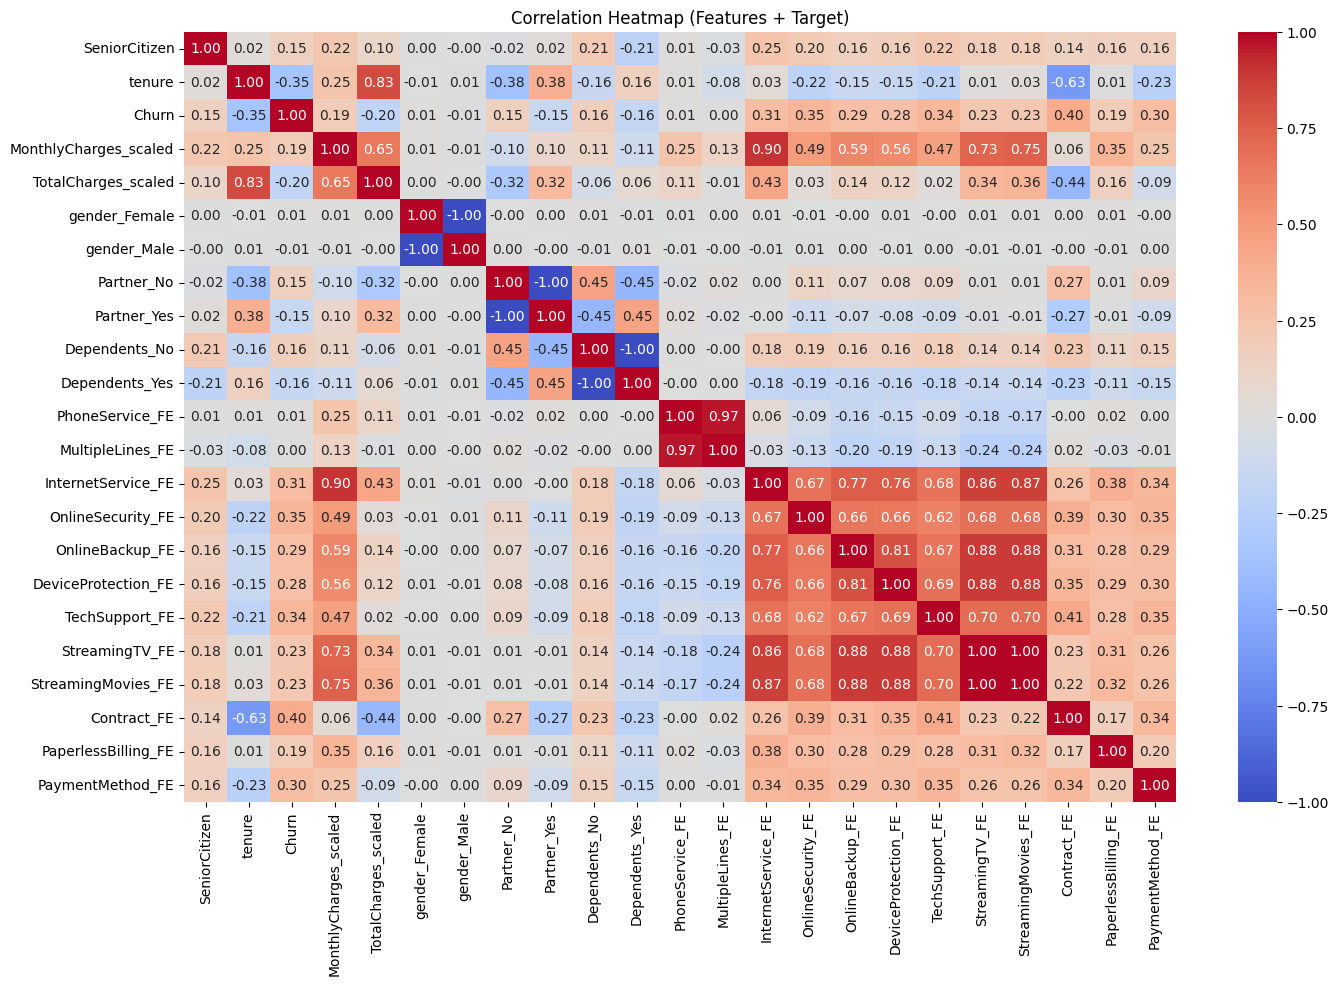

Highly correlated features with target (|correlation| > 0.2):
InternetService_FE     0.904603
StreamingMovies_FE     0.747111
StreamingTV_FE         0.729834
TotalCharges_scaled    0.650864
OnlineBackup_FE        0.589607
DeviceProtection_FE    0.563339
OnlineSecurity_FE      0.488864
TechSupport_FE         0.465110
PaperlessBilling_FE    0.352150
tenure                 0.247900
PhoneService_FE        0.247398
PaymentMethod_FE       0.247175
SeniorCitizen          0.220173
Name: MonthlyCharges_scaled, dtype: float64


In [5]:
# ...existing code...

# Correlation heatmap including target
corr_matrix = df.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Features + Target)")
plt.show()

# Show features highly correlated with target (MonthlyCharges_scaled)
target_corr = corr_matrix['MonthlyCharges_scaled'].drop('MonthlyCharges_scaled').abs()
high_corr_features = target_corr[target_corr > 0.2].sort_values(ascending=False)
print("Highly correlated features with target (|correlation| > 0.2):")
print(high_corr_features)
# ...existing code...

In [6]:
##########################################################################################

Mutual Information

Mutual Information scores (feature vs target):
InternetService_FE     0.846930
TotalCharges_scaled    0.714569
StreamingTV_FE         0.651116
StreamingMovies_FE     0.649859
DeviceProtection_FE    0.564551
OnlineSecurity_FE      0.555122
OnlineBackup_FE        0.540031
TechSupport_FE         0.538919
MultipleLines_FE       0.427841
PhoneService_FE        0.185900
tenure                 0.123239
PaymentMethod_FE       0.114363
Contract_FE            0.072020
PaperlessBilling_FE    0.063745
Churn                  0.046059
SeniorCitizen          0.042027
Partner_No             0.023358
Partner_Yes            0.021290
Dependents_No          0.014257
Dependents_Yes         0.008027
gender_Male            0.000000
gender_Female          0.000000
dtype: float64


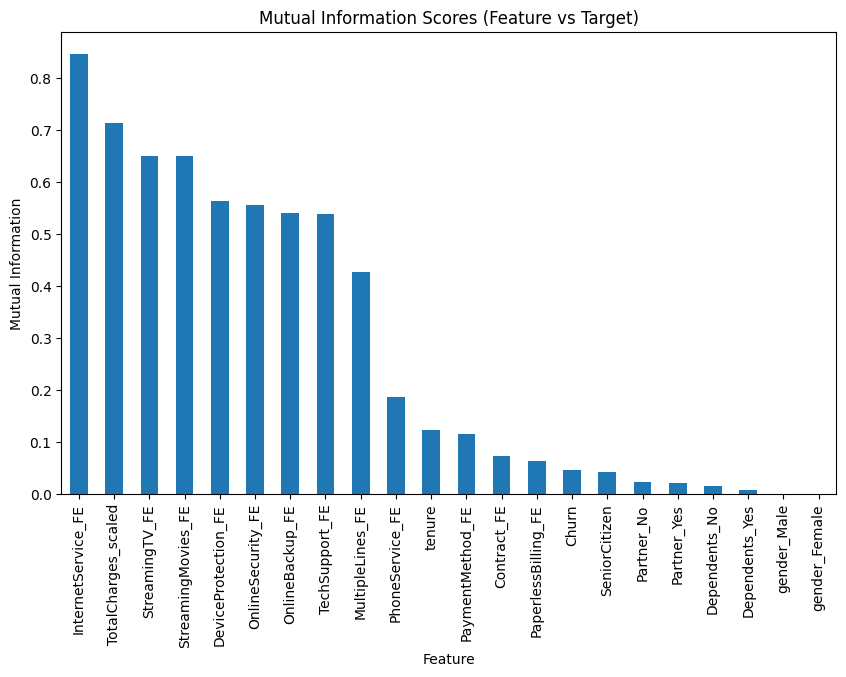

In [8]:
from sklearn.feature_selection import mutual_info_regression

# Fill missing values in features with column mean (for numeric columns)
feature_filled = feature.fillna(feature.mean())

mi_scores = mutual_info_regression(feature_filled, target, random_state=42)
mi_series = pd.Series(mi_scores, index=feature.columns).sort_values(ascending=False)

print("Mutual Information scores (feature vs target):")
print(mi_series)

plt.figure(figsize=(10, 6))
mi_series.plot(kind='bar')
plt.title("Mutual Information Scores (Feature vs Target)")
plt.ylabel("Mutual Information")
plt.xlabel("Feature")
plt.show()

RFE Method

In [10]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Use RandomForestRegressor as the estimator for RFE
estimator = RandomForestRegressor(random_state=42)
rfe = RFE(estimator, n_features_to_select=10)  # Select top 10 features (change as needed)
rfe.fit(feature, target)

# Get selected features
selected_features = feature.columns[rfe.support_]
print("Selected features by RFE:")
print(selected_features)

# Optionally, show feature ranking
ranking = pd.Series(rfe.ranking_, index=feature.columns)
print("\nRFE Feature Ranking (1 = selected):")
print(ranking.sort_values())

Selected features by RFE:
Index(['TotalCharges_scaled', 'PhoneService_FE', 'MultipleLines_FE',
       'InternetService_FE', 'OnlineSecurity_FE', 'OnlineBackup_FE',
       'DeviceProtection_FE', 'TechSupport_FE', 'StreamingTV_FE',
       'StreamingMovies_FE'],
      dtype='object')

RFE Feature Ranking (1 = selected):
TotalCharges_scaled     1
OnlineSecurity_FE       1
DeviceProtection_FE     1
OnlineBackup_FE         1
InternetService_FE      1
MultipleLines_FE        1
PhoneService_FE         1
TechSupport_FE          1
StreamingTV_FE          1
StreamingMovies_FE      1
tenure                  2
PaymentMethod_FE        3
Contract_FE             4
Partner_No              5
gender_Male             6
PaperlessBilling_FE     7
Dependents_Yes          8
Churn                   9
SeniorCitizen          10
Partner_Yes            11
gender_Female          12
Dependents_No          13
dtype: int64


Model Selection

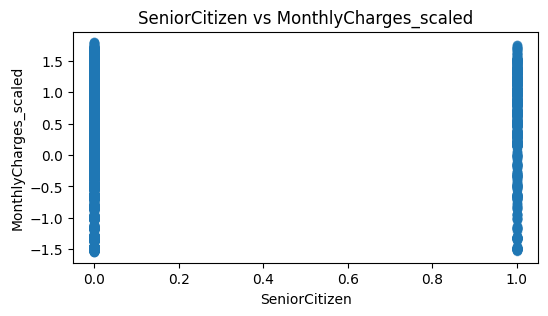

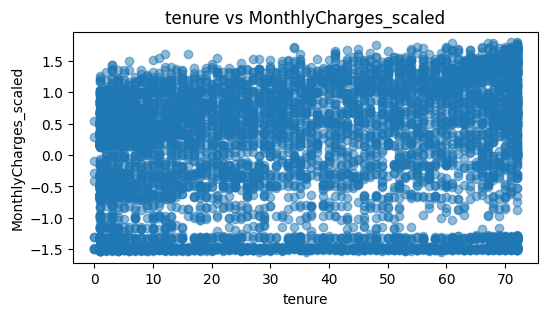

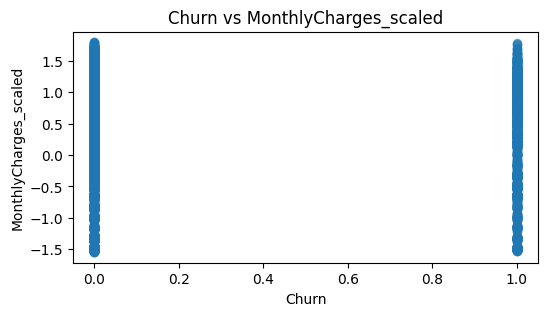

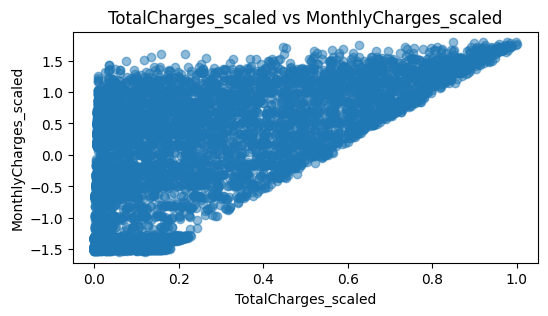

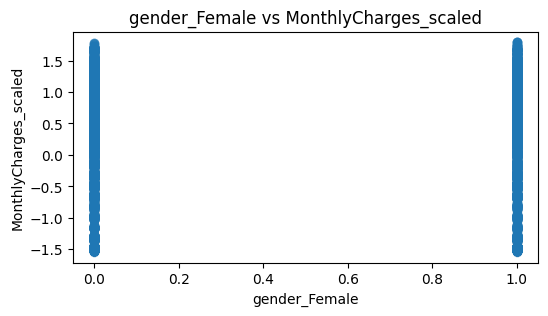

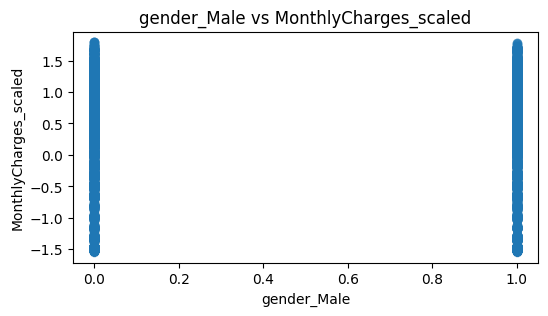

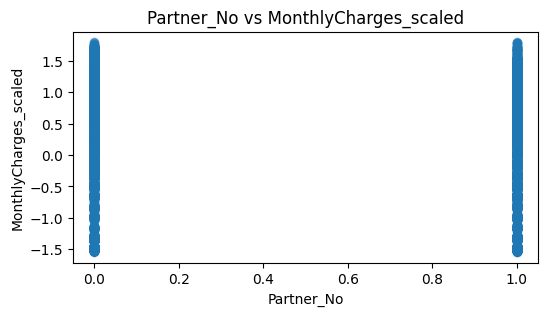

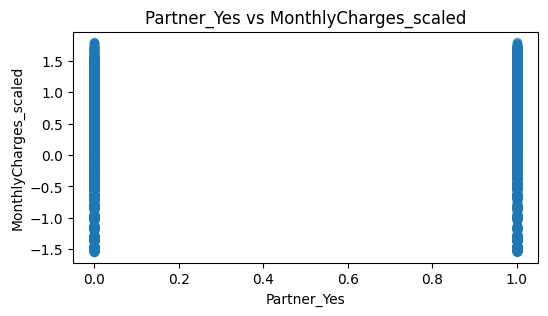

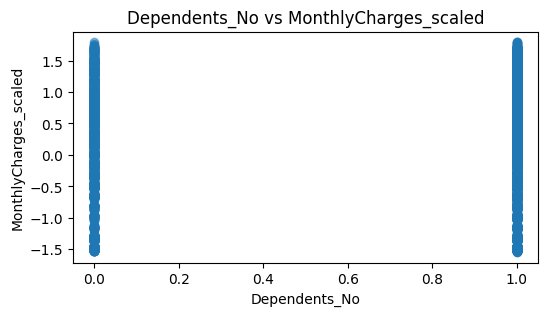

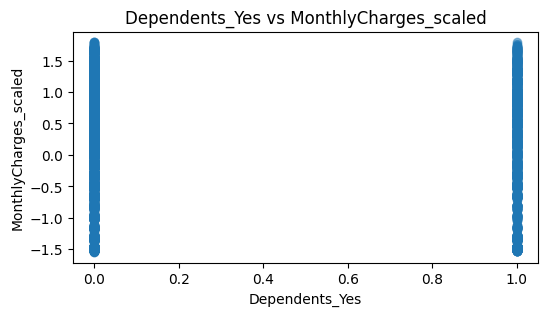

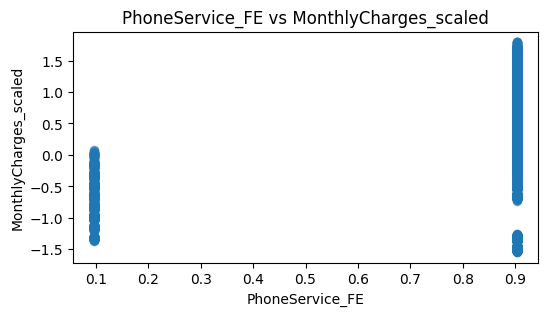

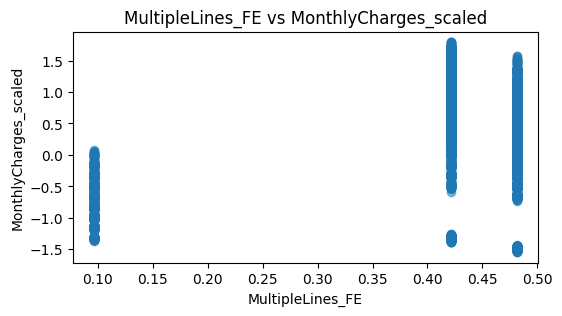

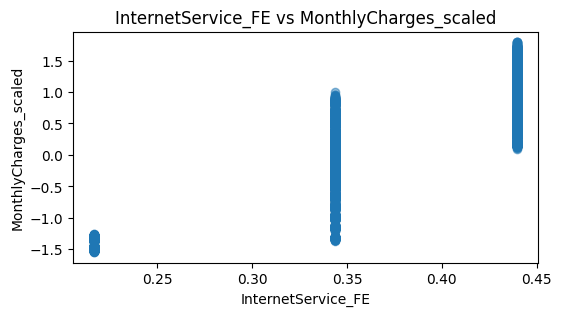

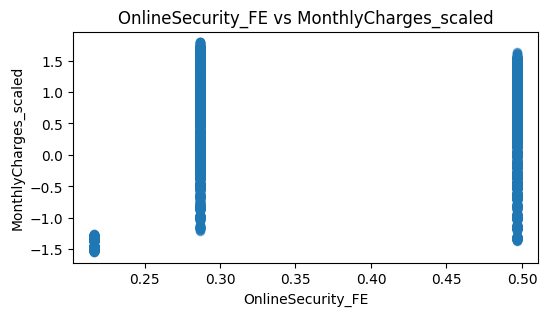

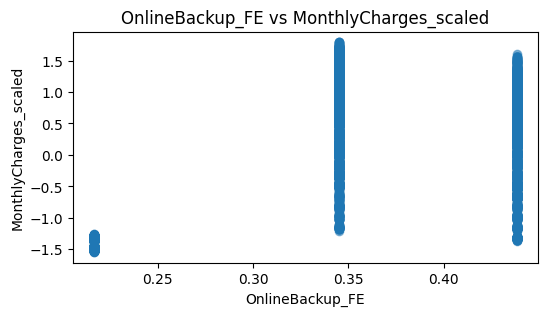

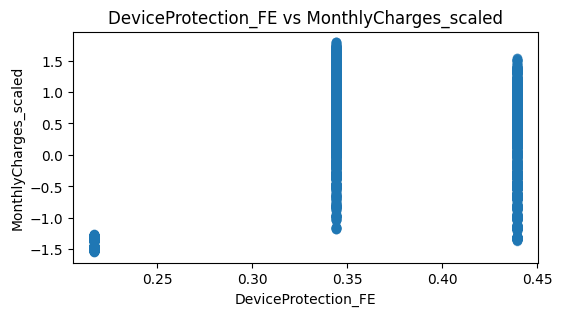

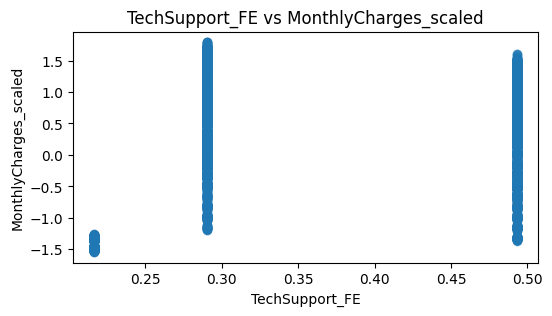

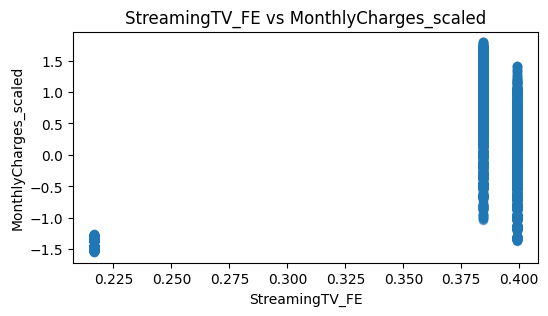

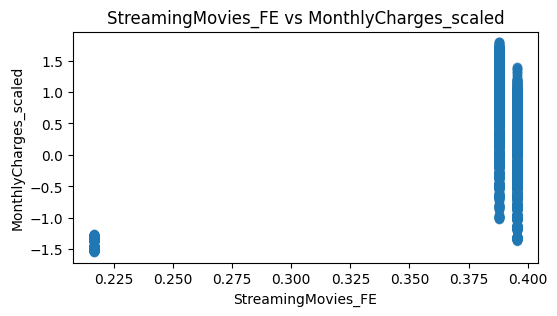

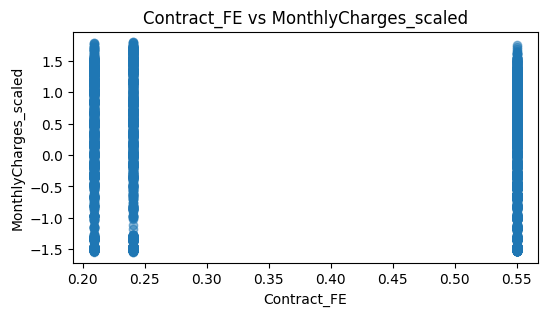

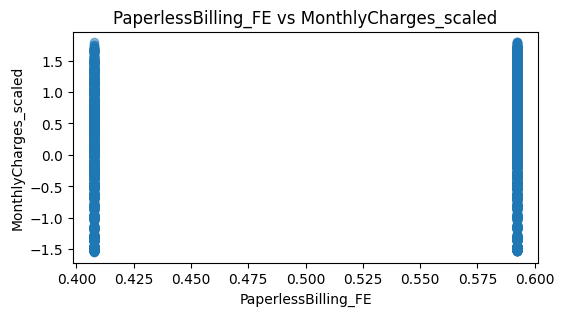

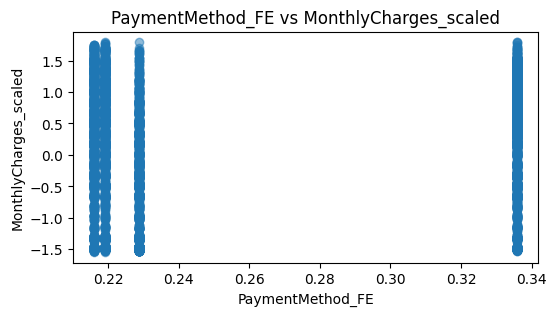

In [12]:
# Scatter plots for each numeric feature vs. MonthlyCharges_scaled
numeric_features = feature.select_dtypes(include=[np.number]).columns

for col in numeric_features:
    plt.figure(figsize=(6, 3))
    plt.scatter(df[col], df['MonthlyCharges_scaled'], alpha=0.5)
    plt.title(f"{col} vs MonthlyCharges_scaled")
    plt.xlabel(col)
    plt.ylabel("MonthlyCharges_scaled")
    plt.show()

Its Purely Classification type feature but try Intrest Columns Shows a Linear Type Support and tenure based columns shows discrete type

In [13]:
#######################################################################################

Score check which feature selection method is suite for this model

Score Check for MI_Score, Correlation Heatmap Score, RFE Score

In [17]:
# ...existing code...

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Helper function to evaluate a regression model
def evaluate_regression_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    n = len(y_test)
    p = X_test.shape[1]
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2,
        "Adjusted R2": adj_r2
    }

# 1. Top 10 MI features
mi_top10 = mi_series.head(10).index.tolist()
mi_results = evaluate_regression_model(feature[mi_top10], target)
print("Linear Regression (Top 10 MI features):", mi_results)

# 2. Top 10 Correlation features
corr_top10 = target_corr.sort_values(ascending=False).head(10).index.tolist()
corr_results = evaluate_regression_model(feature[corr_top10], target)
print("Linear Regression (Top 10 Correlation features):", corr_results)

# 3. RFE selected features
rfe_results = evaluate_regression_model(feature[selected_features], target)
print("Linear Regression (RFE selected features):", rfe_results)

Linear Regression (Top 10 MI features): {'MSE': 0.043022814274503274, 'RMSE': np.float64(0.20741941633922142), 'MAE': 0.16367203498115102, 'R2': 0.9569815690746538, 'Adjusted R2': 0.9566738549764754}
Linear Regression (Top 10 Correlation features): {'MSE': 0.06599169310959914, 'RMSE': np.float64(0.2568884838010438), 'MAE': 0.19572534434412117, 'R2': 0.9340150304076148, 'Adjusted R2': 0.9335430349169682}
Linear Regression (RFE selected features): {'MSE': 0.04302281427450326, 'RMSE': np.float64(0.2074194163392214), 'MAE': 0.16367203498115118, 'R2': 0.9569815690746538, 'Adjusted R2': 0.9566738549764754}


Low MSE and High Accuracy is """"Mutual Information"""" and """"RFE"""" Feature Selection Method

In [18]:
###############################################################################################